In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

metric_names = ['mae', 'rmse', 'pcc', 'r2']

model_names = {
    # 'gcn_d3_FFF-1x32-0_Nmean': '1x32 graph w/o Tm embedding',
    'gcn_d3e_FFF-1x32-0_Nmean': '1x32 graph w/ Tm embedding',
    'c1e-N': 'ProteinBERT',
    'd0e_F': 'Tm embedding',
    'DeepSTABp_architecture': 'DeepSTABp',
}

model_ls_all = np.array([
    # 'gcn_d3_FFF-1x32-0_Nmean',
    'gcn_d3e_FFF-1x32-0_Nmean',
    'c1e-N',
    'd0e_F',
    'DeepSTABp_architecture',
], dtype=np.str_)

In [2]:
save = True
epoch = 150

0 gcn_d3e_FFF-1x32-0_Nmean-train_set.csv
1 c1e-N-train_set.csv
2 d0e_F-train_set.csv
3 DeepSTABp_architecture-train_set.csv


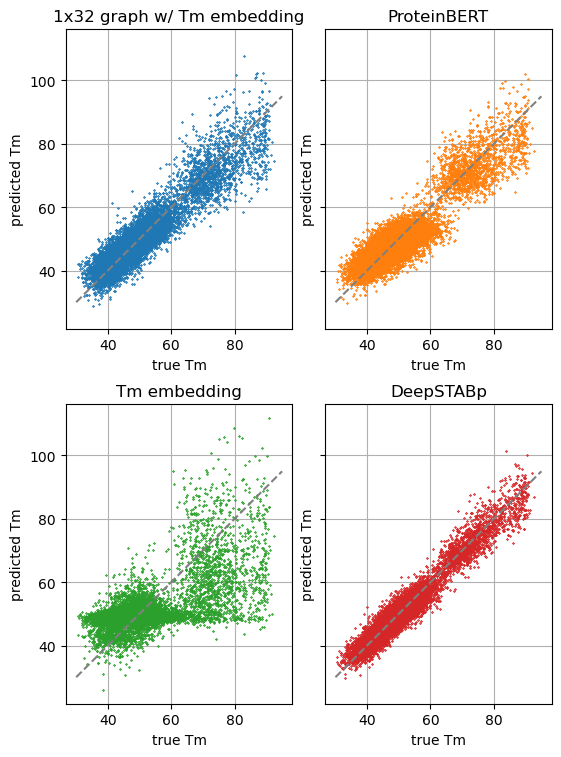

0 gcn_d3e_FFF-1x32-0_Nmean-valid_set.csv
1 c1e-N-valid_set.csv
2 d0e_F-valid_set.csv
3 DeepSTABp_architecture-valid_set.csv


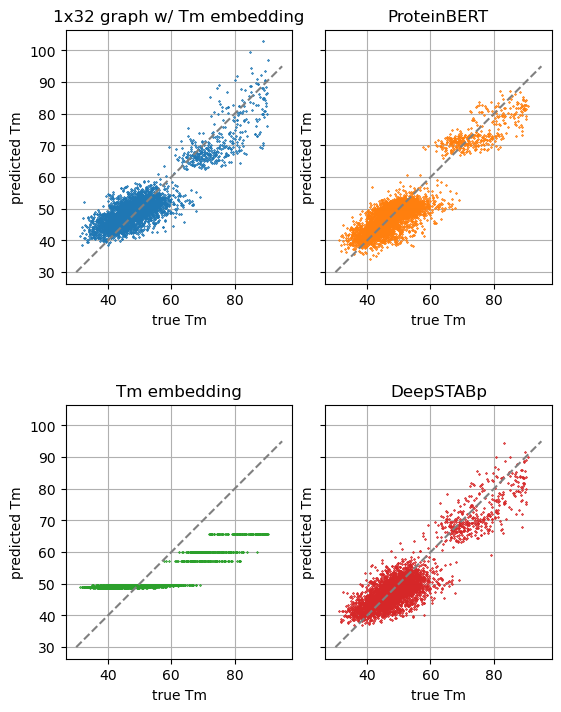

In [15]:
for set_name in ['train', 'valid']:
    fig, ax = plt.subplots(
        2,2, sharex=True, sharey=True, figsize=(5.5,7.5), layout='constrained'
    )
    ax = ax.flatten()
    # fig.suptitle()

    i = 0
    for model_idx, model in enumerate(model_names.keys()):
        
        pred_file = f'{model}-{set_name}_set.csv'
        print(i, pred_file)


        pred = np.loadtxt(pred_file, dtype=np.float_, delimiter=',')
        with open(pred_file, 'r') as f:
            header = f.readline().replace('# ', '')
            true = f.readline().replace('# true_labels,', '')
        true = np.array(true.split(','), dtype=np.float_)

        ax[i].scatter(
            true, pred[epoch-1,1:],
            marker='x', s=1, alpha=0.8, zorder=3,
            c=f'C{np.argwhere(model_ls_all==model).squeeze()}'
        )
        ax[i].plot(
            np.linspace(30,95), np.linspace(30,95),
            '--', c='gray', alpha=1, zorder=4
        )

        ax[i].set_title(model_names[model])
        ax[i].set_xlabel('true Tm')
        ax[i].set_ylabel('predicted Tm')
        ax[i].grid()
        ax[i].set_aspect('equal')
        ax[i].tick_params(labelbottom=True)

        # ax[i].xaxis.tick_bottom()

        # ax[i].set_xlim(0, df['epoch'].max())
        # ax[i].set_ylim(metric_limits[metric])

        i += 1

    if save:
        plt.savefig(
        f'true_vs_pred-{set_name}.png',
        dpi=300#, bbox_inches='tight'
    )
    plt.show()
    plt.close()